In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [ ]:
### load the dataset

In [337]:
dataset=pd.read_csv('train.csv',nrows=5000)
print(dataset.head())

  Lunation Number Date of occurrence  Day of Month Time of occurrence  \
0        LN-49456            2023-06            26           14:13:28   
1        LN-49451            2022-11            21           20:23:49   
2        LN-49445            2020-05            17           05:47:36   
3        LN-49439            2025-11            11           05:15:58   
4        LN-49433            2024-05             6           18:57:01   

   Time Difference  Angle of Rays Eclipse Type 1   Gamma  Magnitude 1  \
0            46437             17              N -1.0981       0.8791   
1            46427            -16              N -1.1155       0.8143   
2            46416            -11              P  0.8988       1.2105   
3            46404             -6              P -0.4644       2.0382   
4            46392             -1             T+  0.1003       2.6513   

  Latitude Longitude  Eclipse Duration (m)  
0      24S       22W             278.53620  
1      15N       98W            

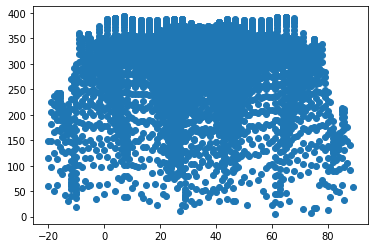

In [338]:
plt.scatter(dataset['Angle of Rays'],dataset['Eclipse Duration (m)'])

In [ ]:
### create a plot with gamma and eclipse duration

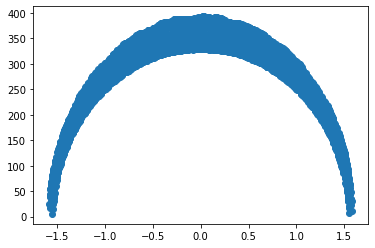

In [339]:
plt.scatter(dataset['Gamma'],dataset['Eclipse Duration (m)'])

In [ ]:
### create a plot with magnitude and eclipse duration

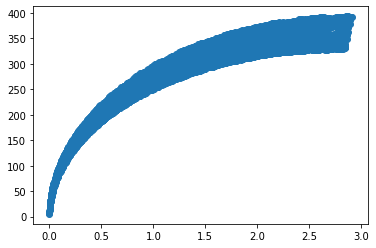

In [340]:
plt.scatter(dataset['Magnitude 1'],dataset['Eclipse Duration (m)'])

In [341]:
dataset=dataset.drop('Lunation Number',axis=1)

In [342]:
dataset.head()

,Date of occurrence,Day of Month,Time of occurrence,Time Difference,Angle of Rays,Eclipse Type 1,Gamma,Magnitude 1,Latitude,Longitude,Eclipse Duration (m)
0,2023-06,26,14:13:28,46437,17,N,-1.0981,0.8791,24S,22W,278.53620
1,2022-11,21,20:23:49,46427,-16,N,-1.1155,0.8143,15N,98W,241.84410
2,2020-05,17,05:47:36,46416,-11,P,0.8988,1.2105,13S,89E,291.90705
3,2025-11,11,05:15:58,46404,-6,P,-0.4644,2.0382,12N,113E,355.85910
4,2024-05,6,18:57:01,46392,-1,T+,0.1003,2.6513,11S,92W,334.50720


In [343]:
#dataset=dataset.drop('Date of occurrence',axis=1)
dataset=dataset.drop('Day of Month',axis=1)
dataset=dataset.drop('Time of occurrence',axis=1)
dataset=dataset.drop('Time Difference',axis=1)
dataset=dataset.drop('Latitude',axis=1)
dataset=dataset.drop('Longitude',axis=1)



In [ ]:
### remove all unnecessary coluums of data

In [344]:
dataset.head(10)

,Date of occurrence,Angle of Rays,Eclipse Type 1,Gamma,Magnitude 1,Eclipse Duration (m)
0,2023-06,17,N,-1.0981,0.8791,278.53620
1,2022-11,-16,N,-1.1155,0.8143,241.84410
2,2020-05,-11,P,0.8988,1.2105,291.90705
3,2025-11,-6,P,-0.4644,2.0382,355.85910
4,2024-05,-1,T+,0.1003,2.6513,334.50720
5,2023-10,4,T+,0.2207,2.5057,387.99060
6,2021-04,9,P,-0.6385,1.6562,299.05890
7,2024-10,14,P,0.8915,1.2694,319.99620
8,2020-03,-19,N,1.2015,0.6538,224.84550
9,2022-04,19,N,-1.4029,0.2681,144.51675


In [345]:
dataset=dataset.drop('Eclipse Type 1',axis=1)

In [346]:
dataset.head()

,Date of occurrence,Angle of Rays,Gamma,Magnitude 1,Eclipse Duration (m)
0,2023-06,17,-1.0981,0.8791,278.53620
1,2022-11,-16,-1.1155,0.8143,241.84410
2,2020-05,-11,0.8988,1.2105,291.90705
3,2025-11,-6,-0.4644,2.0382,355.85910
4,2024-05,-1,0.1003,2.6513,334.50720


In [347]:
from sklearn.model_selection import train_test_split
x=dataset[['Angle of Rays','Gamma','Magnitude 1']]
y=dataset['Eclipse Duration (m)']
X_train,x_test,Y_train,y_test=train_test_split(x,y,test_size=0.2)

In [348]:
X_train

,Angle of Rays,Gamma,Magnitude 1
3849,52,0.0152,2.8300
4819,58,-0.5514,1.8612
877,-7,1.4615,0.1641
1094,13,0.3500,2.2593
4010,55,-0.3064,2.2903
...,...,...,...
772,-6,-1.2196,0.6529
1700,32,0.9148,1.2236
2489,25,0.5525,1.8792
933,0,-0.9340,1.1864


In [349]:
x_test

,Angle of Rays,Gamma,Magnitude 1
1062,15,-0.0505,2.7404
1897,26,-0.0517,2.7890
3927,60,0.3460,2.2316
4152,74,1.3443,0.3831
4081,43,1.0465,0.9761
...,...,...,...
1845,39,-0.8957,1.2086
2920,21,1.1073,0.8575
2964,26,-1.1244,0.7725
1045,11,0.3293,2.2528


In [350]:
clf=LinearRegression()
clf.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
### applied linear regression

In [351]:
clf.predict(x_test)

array([398.45859881, 402.94066031, 353.01106421, 186.50918679,
       239.69002296, 375.86393581, 324.14206123, 163.86872697,
       201.0595277 , 212.8525996 , 368.37082158, 291.50926597,
       353.99265356, 397.08747089, 267.42112677, 294.62479594,
       329.23737117, 263.88615557, 239.68279249, 274.66435631,
       406.8509507 , 259.95113047, 205.65483982, 405.75974646,
       233.04532561, 285.65777478, 240.79888035, 359.60253628,
       175.06070239, 390.26107333, 314.54462134, 324.48212852,
       408.53640826, 315.54094456, 329.51403766, 320.82979894,
       365.22472363, 364.85534986, 211.02612472, 195.34152274,
       279.23933633, 266.69911296, 318.48113409, 306.32890129,
       297.05645524, 205.43710905, 241.12817678, 299.47605508,
       237.08985386, 315.6299351 , 194.42241404, 286.56276229,
       171.16317831, 355.60502361, 289.26335843, 282.54812394,
       364.56949614, 197.18167784, 359.18887302, 336.07086752,
       243.46927412, 281.25997256, 291.83967071, 344.52

In [352]:
y_test

1062    333.15975
1897    366.63870
3927    346.21965
4152    174.26430
4081    290.97420
          ...    
1845    285.68805
2920    266.82375
2964    227.95500
1045    335.54370
3127    280.40190
Name: Eclipse Duration (m), Length: 1000, dtype: float64

In [353]:
clf.score(x_test,y_test)

0.8179941587506013

In [354]:
clf1=Lasso(alpha=0.001)
clf1.fit(X_train,Y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [355]:
clf.predict(x_test)

array([398.45859881, 402.94066031, 353.01106421, 186.50918679,
       239.69002296, 375.86393581, 324.14206123, 163.86872697,
       201.0595277 , 212.8525996 , 368.37082158, 291.50926597,
       353.99265356, 397.08747089, 267.42112677, 294.62479594,
       329.23737117, 263.88615557, 239.68279249, 274.66435631,
       406.8509507 , 259.95113047, 205.65483982, 405.75974646,
       233.04532561, 285.65777478, 240.79888035, 359.60253628,
       175.06070239, 390.26107333, 314.54462134, 324.48212852,
       408.53640826, 315.54094456, 329.51403766, 320.82979894,
       365.22472363, 364.85534986, 211.02612472, 195.34152274,
       279.23933633, 266.69911296, 318.48113409, 306.32890129,
       297.05645524, 205.43710905, 241.12817678, 299.47605508,
       237.08985386, 315.6299351 , 194.42241404, 286.56276229,
       171.16317831, 355.60502361, 289.26335843, 282.54812394,
       364.56949614, 197.18167784, 359.18887302, 336.07086752,
       243.46927412, 281.25997256, 291.83967071, 344.52

In [356]:
clf1.score(x_test,y_test)

0.8179946776330519

In [ ]:
## got the accuracy 81.7 percent in both linear regression lasso regression

